In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import pandas # use pandas to read in csv files

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [2]:
# Load file
data_file_path = "character-deaths.csv"
df = pandas.read_csv(data_file_path) # read in csv file
for i in range(0,2):
    df = df.drop(df.columns[0], axis=1) # drop the first two columns, as they have no numerical data
    
df = df.fillna(0) # fill NaN (none) with 0
    
target = df['Death Chapter'] # make the column "Death Chapter" as the target values
df = df.drop('Death Chapter', axis=1) # dropping the "Death Chapter" column from the main data
data = np.matrix(df)

train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

Intercept: [0.33792778]
Coefficients: [[ 0.14977267 -2.49950757  0.13891734 -1.56239839  0.53285068 -0.87050987
  -0.75826978 -3.68970262 -1.57222826 -0.89632012]]
Errors Training Data: 75.39110225382798
Errors Testing Data: 56.64862568327051


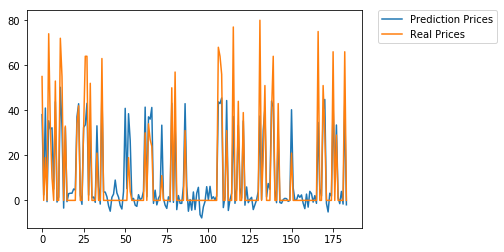

In [3]:
# Function to get linear model
def lin_model_generator(data, coefficients):
    return np.matmul(coefficients.T, data)

# Function to get loss function error
def loss_function(data_values, target_values, coefficients):
    n_len = len(data_values)
    xw_matrix = np.matmul(data_values, coefficients)
    temp_subtract = target_values - xw_matrix
    return ((1/(2 * n_len)) * (np.matmul(temp_subtract.T, temp_subtract))).item(0)

# Use LinearRegression() library
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_data, train_target)

# Show intercept and coefficients
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

print("Intercept: ", end="")
print(intercept)
print("Coefficients: ", end="")
print(coefficients)

# Show errors
train_data_intercept = np.insert(train_data, 0, 1, axis=1) # insert 1s into the train data matrix
test_data_intercept = np.insert(test_data, 0, 1, axis=1) # insert 1s into the test data matrix
coef_intercept = np.insert(coefficients, 0, intercept, axis=1).T # insert intercept into the coefficient matrix

print("Errors Training Data: ", end="")
print(loss_function(train_data_intercept, train_target, coef_intercept))
print("Errors Testing Data: ", end="")
print(loss_function(test_data_intercept, test_target, coef_intercept))

# Plot prediction values vs. real values
prediction_prices = lin_model_generator(test_data_intercept.T, coef_intercept).T
index = np.matrix(np.arange(prediction_prices.shape[0])).T

plt.plot(index, prediction_prices, label = "Prediction Prices")
plt.plot(test_target, label = "Real Prices")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()